<a href="https://colab.research.google.com/github/MariaIsabelLL/AnalisisSentimientosTwitter/blob/main/3_Analisis_Sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
total 2000
categorias ['neg', 'pos']
total positivos 1000
total negativos 1000
710578
10 palabras más frecuentes [('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049)]
cantidad de veces que se repite la palabra happy 215


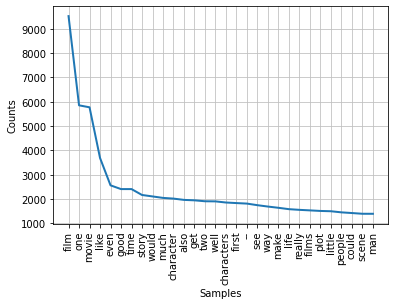

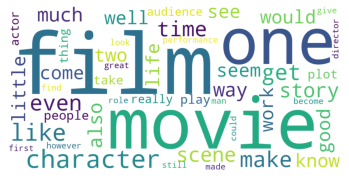

In [ ]:
import nltk
nltk.download('movie_reviews')
nltk.download('stopwords')

from nltk.corpus import movie_reviews 
from nltk import FreqDist
from random import shuffle 
import string
from nltk import NaiveBayesClassifier
from nltk import classify 
from nltk.tokenize import word_tokenize
from nltk import ngrams
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stopwords_english = stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')

def Estadisticas():
    
    print('total',len(movie_reviews.fileids())) 
    print('categorias',movie_reviews.categories()) 
    print('total positivos',len(movie_reviews.fileids('pos')))
    print('total negativos',len(movie_reviews.fileids('neg'))) 
     
    all_words = [word.lower() for word in movie_reviews.words()]
    all_words_final = [word for word in all_words if word not in stopwords_english and word not in string.punctuation]
    #print(len(all_words))
    print(len(all_words_final))
    all_words_frequency = FreqDist(all_words_final)
    print('10 palabras más frecuentes',all_words_frequency.most_common(10))
    print('cantidad de veces que se repite la palabra happy',all_words_frequency['happy'])
    all_words_frequency.plot(30, cumulative=False)

    #genera nube de palabras
    comment_words = ' '
    for word in all_words_final: 
      word = str(word)
      comment_words = comment_words + word + ' '   
    generate_wordcloud(comment_words)

def generate_wordcloud(text): 
    wordcloud = WordCloud(
         background_color="white", max_words=5000, 
         min_font_size = 10, 
         max_font_size=100, 
         relative_scaling = 0.5, 
         stopwords=stopwords,
         scale=3,
         random_state=3,
         normalize_plurals=True)
    wordcloud.generate(text)
    
    #plt.figure(figsize=(25,25))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Estadisticas()

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def bag_of_words(words):
    words_clean = []
    stopwords_english = stopwords.words('english')
    
    for word in words:
        word = word.lower()
        if word not in stopwords_english and word not in string.punctuation:
            words_clean.append(word)
    
    words_dictionary = dict([word, True] for word in words_clean)
    #print('dictionario',words_dictionary)
    return words_dictionary



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def DatosBOW():
    pos_reviews = []
    for fileid in movie_reviews.fileids('pos'):
        words = movie_reviews.words(fileid)
        pos_reviews.append(words)
     
    neg_reviews = []
    for fileid in movie_reviews.fileids('neg'):
        words = movie_reviews.words(fileid)
        neg_reviews.append(words)
        
    pos_reviews_set = []
    i=0
    for words in pos_reviews:
        i=i+1
        pos_reviews_set.append((bag_of_words(words), 'pos'))
     
    neg_reviews_set = []
    j=0
    for words in neg_reviews:
        j=j+1
        neg_reviews_set.append((bag_of_words(words), 'neg'))
    #print('POSITIVO',neg_reviews_set)   
    #print('NEGATIVO',neg_reviews_set)   
    print(i)
    print('total neg',j)
    return pos_reviews_set,neg_reviews_set

In [ ]:
def clasificadorBOW(pos_reviews_set,neg_reviews_set):     
    size = int(len(pos_reviews_set) * 0.1)     
    test_set = pos_reviews_set[:size] + neg_reviews_set[:size]
    train_set = pos_reviews_set[size:] + neg_reviews_set[size:]
    print(len(test_set),  len(train_set))
    classifier = NaiveBayesClassifier.train(train_set) 
    accuracy = classify.accuracy(classifier, test_set)
    print(accuracy)  
    print (classifier.show_most_informative_features(10))
    return classifier

In [ ]:
import nltk
nltk.download('punkt')
def pruebaBOW(custom_review,classifier):  
    custom_review_tokens = word_tokenize(custom_review)
    custom_review_set = bag_of_words(custom_review_tokens)
    print (custom_review) 
    print ('positivo o negativo?',classifier.classify(custom_review_set)) 
    prob_result = classifier.prob_classify(custom_review_set)
    print ('probabilidad para negativo',prob_result.prob("neg")) 
    print ('probabilidad para positivo',prob_result.prob("pos")) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
(pos_reviews_set,neg_reviews_set) = DatosBOW()
clasifierBOW = clasificadorBOW(pos_reviews_set,neg_reviews_set)
texto = "I hated the film. It was a disaster. Poor direction, bad acting."
pruebaBOW(texto,clasifierBOW)
texto = "It was a wonderful and amazing movie. I loved it. Best direction, good acting."
pruebaBOW(texto,clasifierBOW)

1000
total neg 1000
200 1800
0.68
Most Informative Features
               ludicrous = True              neg : pos    =     13.8 : 1.0
                gripping = True              pos : neg    =     11.7 : 1.0
                    slip = True              pos : neg    =     11.7 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
             outstanding = True              pos : neg    =     11.2 : 1.0
              astounding = True              pos : neg    =     11.0 : 1.0
                  regard = True              pos : neg    =     11.0 : 1.0
               insulting = True              neg : pos    =     10.6 : 1.0
             fascination = True              pos : neg    =     10.3 : 1.0
                   sucks = True              neg : pos    =     10.2 : 1.0
None
I hated the film. It was a disaster. Poor direction, bad acting.
positivo o negativo? neg
probabilidad para negativo 0.8389515850310557
probabilidad para positivo 0.16104841496894456
It